In [11]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import ast
import numpy as np

In [12]:
questions = pd.read_csv('data/Binary/CombinedBinaryDataWithCategories.csv')
questions

,QuestionText,Answer,Year,Categories
0,Will advanced LIGO announce discovery of gravi...,no,2016,"['Technology', 'Stock Market']"
1,Will SpaceX successfully land a Falcon 9 rocke...,no,2016,[]
2,Will we confirm evidence for megastructures or...,no,2016,"['Technology', 'Political', 'Sports', 'Health ..."
3,Will Lockheed Martin and Skunkworks announce a...,no,2019,[]
4,The FAA to soon open the door to commercial us...,no,2016,"['Technology', 'Stock Market']"
...,...,...,...,...
4458,"Between 3 October 2019 and 29 November 2019, w...",no,2019,['Health and Epidemiology']
4459,Will the PITF Worldwide Atrocities Dataset rec...,yes,2019,"['Health and Epidemiology', 'Stock Market']"
4460,Will ACLED record any civilian fatalities in R...,yes,2019,"['Health and Epidemiology', 'Stock Market']"
4461,Will ACLED record any civilian fatalities in S...,yes,2019,"['Health and Epidemiology', 'Stock Market']"


In [13]:
def get_value(text):
    if 'yes' in text.lower():
        return 1
    elif 'no' in text.lower():
        return 0
    else:
        return None

In [14]:
def makeCM(combined):
    y_true = []
    y_pred = []
    noneCount = 0
    for i in range(len(combined['Predictions'])):
        temp1 = get_value(combined['Predictions'][i])
        if temp1 is None:
            noneCount += 1
            continue
        y_pred.append(temp1)
        y_true.append(get_value(combined['Answer'][i]))
    return y_pred, y_true, noneCount

In [15]:
allYears = list(questions['Year'].unique())
allYears

[2016, 2019, 2017, 2015, 2018, 2022, 2020, 2021, 2023]

In [16]:
allCategories = [
    'Technology',
    'Political',
    'Sports',
    'Health and Epidemiology',
    'Stock Market',
    'Supply Chain'
]

### WizardLM

In [7]:
data1 = pd.read_csv('data/Binary/testSave0-1999.csv')
data2 = pd.read_csv('data/Binary/testSave2000-2900.csv')
data3 = pd.read_csv('data/Binary/testSave2900-2999.csv')
data3 = data3.iloc[1:, :]
data4 = pd.read_csv('data/Binary/testSave3000-3300.csv')
data5 = pd.read_csv('data/Binary/testSave3300-3699.csv')
data5 = data5.iloc[1:, :]
data6 = pd.read_csv('data/Binary/testSave3700-4000.csv')
data7 = pd.read_csv('data/Binary/testSave4000-4300.csv')
data7 = data7.iloc[1:,:]
data8 = pd.read_csv('data/Binary/testSave4300-4462.csv')
data8 = data8.iloc[1:,:]

In [8]:
finalPredictions = []
finalPredictions.extend(list(data1['predictions']))
finalPredictions.extend(list(data2['predictions']))
finalPredictions.extend(list(data3['predictions']))
finalPredictions.extend(list(data4['predictions']))
finalPredictions.extend(list(data5['predictions']))
finalPredictions.extend(list(data6['predictions']))
finalPredictions.extend(list(data7['predictions']))
finalPredictions.extend(list(data8['predictions']))

# Using WLM in varibale namings coz the model's name is WizardLM
WLMPredictions = finalPredictions
WLMTotal = questions.copy(deep=True)
WLMTotal['Predictions'] = WLMPredictions
WLMTotal

,QuestionText,Answer,Year,Categories,Predictions
0,Will advanced LIGO announce discovery of gravi...,no,2016,"['Technology', 'Stock Market']",NO
1,Will SpaceX successfully land a Falcon 9 rocke...,no,2016,[],YES
2,Will we confirm evidence for megastructures or...,no,2016,"['Technology', 'Political', 'Sports', 'Health ...",NO
3,Will Lockheed Martin and Skunkworks announce a...,no,2019,[],NO
4,The FAA to soon open the door to commercial us...,no,2016,"['Technology', 'Stock Market']",YES
...,...,...,...,...,...
4458,"Between 3 October 2019 and 29 November 2019, w...",no,2019,['Health and Epidemiology'],YES
4459,Will the PITF Worldwide Atrocities Dataset rec...,yes,2019,"['Health and Epidemiology', 'Stock Market']",YES
4460,Will ACLED record any civilian fatalities in R...,yes,2019,"['Health and Epidemiology', 'Stock Market']",YES
4461,Will ACLED record any civilian fatalities in S...,yes,2019,"['Health and Epidemiology', 'Stock Market']",YES


### Total Predictions

In [9]:
yPredWLMTotal, yTrueWLMTotal, noneCountWLMTotal = makeCM(WLMTotal)
print(f'Total None predictions: {noneCountWLMTotal}')
confusion_matrix(yTrueWLMTotal, yPredWLMTotal)

Total None predictions: 0


array([[2517,  424],
       [1159,  363]], dtype=int64)

### Years

In [51]:
WLMyearsData = {}
for year in allYears:
    yearData = WLMTotal[WLMTotal['Year']==year]
    yearData = yearData.reset_index()
    WLMyearsData[year] = makeCM(yearData)

correct = []
incorrect = []
for year in WLMyearsData:
    cm = confusion_matrix(WLMyearsData[year][1], WLMyearsData[year][0])
    correct.append((cm[0][0]+cm[1][1]))
    incorrect.append(np.sum(cm)-correct[-1])

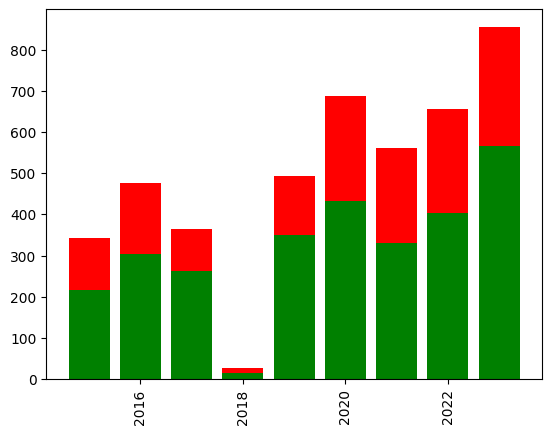

In [55]:
import matplotlib.pyplot as plt

x = sorted(WLMyearsData)

y1 = correct
y2 = incorrect

plt.bar(x, y1, color='g')
plt.bar(x, y2, bottom=y1, color='r')
plt.xticks(rotation=90)
plt.show()

### Categories

In [38]:
present = {cat:[] for cat in allCategories}

for i in range(len(WLMTotal['Categories'])):
    WLMTotal['Categories'][i] = ast.literal_eval(WLMTotal['Categories'][i])
    for cat in present:
        if cat in WLMTotal['Categories'][i]:
            present[cat].append(True)
        else:
            present[cat].append(False)

for cat in present:
    WLMTotal[cat] = present[cat]
WLMTotal

C:\Users\vetur\AppData\Local\Temp\ipykernel_13776\3857081748.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WLMTotal['Categories'][i] = ast.literal_eval(WLMTotal['Categories'][i])


,QuestionText,Answer,Year,Categories,Predictions,Technology,Political,Sports,Health and Epidemiology,Stock Market,Supply Chain
0,Will advanced LIGO announce discovery of gravi...,no,2016,"[Technology, Stock Market]",NO,True,False,False,False,True,False
1,Will SpaceX successfully land a Falcon 9 rocke...,no,2016,[],YES,False,False,False,False,False,False
2,Will we confirm evidence for megastructures or...,no,2016,"[Technology, Political, Sports, Health and Epi...",NO,True,True,True,True,True,True
3,Will Lockheed Martin and Skunkworks announce a...,no,2019,[],NO,False,False,False,False,False,False
4,The FAA to soon open the door to commercial us...,no,2016,"[Technology, Stock Market]",YES,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4458,"Between 3 October 2019 and 29 November 2019, w...",no,2019,[Health and Epidemiology],YES,False,False,False,True,False,False
4459,Will the PITF Worldwide Atrocities Dataset rec...,yes,2019,"[Health and Epidemiology, Stock Market]",YES,False,False,False,True,True,False
4460,Will ACLED record any civilian fatalities in R...,yes,2019,"[Health and Epidemiology, Stock Market]",YES,False,False,False,True,True,False
4461,Will ACLED record any civilian fatalities in S...,yes,2019,"[Health and Epidemiology, Stock Market]",YES,False,False,False,True,True,False


In [ ]:
getCM()

In [56]:
WLMcategoriesData = {}
for category in allCategories:
    categoryData = WLMTotal[WLMTotal[category]]
    categoryData = categoryData.reset_index()
    WLMcategoriesData[category] = makeCM(categoryData)

correct = []
incorrect = []
for category in sorted(WLMcategoriesData):
    cm = confusion_matrix(WLMcategoriesData[category][1], WLMcategoriesData[category][0])
    correct.append((cm[0][0]+cm[1][1])/np.sum(cm))
    incorrect.append(1-correct[-1])

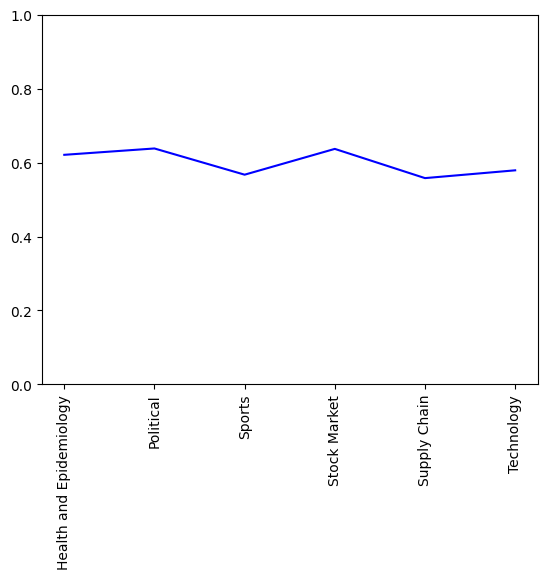

In [59]:
import matplotlib.pyplot as plt

x = sorted(WLMcategoriesData)

y1 = correct

plt.box(x, y1, color='b')
#plt.bar(x, y2, bottom=y1, color='r')
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.show()

### Hermes

In [25]:
hermesData = pd.read_csv('data/Binary/Falcon-0-4462.csv')
hermesPredictions = hermesData['predictions']
hermesTotal = questions.copy(deep=True)
hermesTotal['Predictions'] = hermesPredictions
hermesTotal

,QuestionText,Answer,Year,Categories,Predictions
0,Will advanced LIGO announce discovery of gravi...,no,2016,"['Technology', 'Stock Market']","Yes, advanced LIGO announced the discovery of ..."
1,Will SpaceX successfully land a Falcon 9 rocke...,no,2016,[],Yes
2,Will we confirm evidence for megastructures or...,no,2016,"['Technology', 'Political', 'Sports', 'Health ...","Yes, we will confirm evidence for megastructur..."
3,Will Lockheed Martin and Skunkworks announce a...,no,2019,[],"Yes, Lockheed Martin and Skunkworks announced ..."
4,The FAA to soon open the door to commercial us...,no,2016,"['Technology', 'Stock Market']","Yes, the FAA has announced plans to allow comm..."
...,...,...,...,...,...
4458,"Between 3 October 2019 and 29 November 2019, w...",no,2019,['Health and Epidemiology'],Yes
4459,Will the PITF Worldwide Atrocities Dataset rec...,yes,2019,"['Health and Epidemiology', 'Stock Market']","Yes, the PITF Worldwide Atrocities Dataset wil..."
4460,Will ACLED record any civilian fatalities in R...,yes,2019,"['Health and Epidemiology', 'Stock Market']","Yes, ACLED will record any civilian fatalities..."
4461,Will ACLED record any civilian fatalities in S...,yes,2019,"['Health and Epidemiology', 'Stock Market']","Yes, ACLED will record any civilian fatalities..."


In [26]:
yPredWLMTotal, yTrueWLMTotal, noneCountWLMTotal = makeCM(hermesTotal)
print(f'Total None predictions: {noneCountWLMTotal}')
confusion_matrix(yTrueWLMTotal, yPredWLMTotal)

Total None predictions: 1


array([[ 385, 2556],
       [ 177, 1344]], dtype=int64)

### Falcon